# Executive Summary:

The following report has defined 6 primary traits to define the sample provided by the survey. Divided into two categories addressing material behavior and potential motivation with three components each based on self-description. A more in-depth description of each category found later in the report, but the following will function as a thesis for each.

Within App Consumption:
1.	Trenster – Utilizes their phone to create social or personal value regardless of monetary cost
2.	Traditionalist – Sees their phone as a purely functional tool
3.	Selective Utility User – Aggressively avoids monetization but sees value in technical functions

Within Psychographic: 
1.	Visibility Motivated – Wants to generate value from their media be that monetary or social
2.	Community Motivated – Prioritizes social value by seeking and connecting with likeminded individuals
3.	Gratification Motivated – See’s technology as a form of self-expression and creative outlet. With or without an audience

# Data Loading & Exploration

In [50]:
########################################
# importing packages
########################################
import numpy                 as np  # mathematical essentials
import pandas                as pd  # data science essentials
import matplotlib.pyplot     as plt # fundamental data visualization
import seaborn               as sns # enhanced visualizations

# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering
from sklearn.utils           import Bunch               # Bunch
    

########################################
# loading data and setting display options
########################################
# loading data
file = "./datasets/Mobile_App_Survey_Data.xlsx"

#reading the excel file
mobile_df = pd.read_excel(file)


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


#printing the dataframe
#mobile_df.head(n = 10)


In [51]:
#printing the information
#mobile_df.info()

In [52]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./Session 1-4 (RegressionModeling)/__analysis_images/app_survey.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [53]:
#printing the columns
#mobile_df.columns

# Market Segmentation 

In [54]:
#creating a dictionary for the market segementation
#creating a new dataframe for the demographics without dropping any columns
#using loc and calling it demo_mobile

#grouping the demographics together using a list
#grouping together questions 1, 56, and 57
demographics =mobile_df.loc[:, ['q1','q56','q57']]

#renaming the demographics together using a list
demographics.columns=['Age','Income', 'Gender']

#grouping the consumer behavior together using a list.
#grouping together questions 2 and 13
consumer_behavior = mobile_df.loc[:, ['q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 
                                  'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10','q13r1', 'q13r2', 
                                  'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 
                                  'q13r8', 'q13r9', 'q13r10', 'q13r11','q13r12'
                                   ]]
#grouping the app consumption together using a list.
#grouping together questions 4, 11, 12, and 26
app_consume = mobile_df.loc[:, ['q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 
                                  'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 
                                  'q4r11', 'q11', 'q12','q26r18', 'q26r3', 
                                'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 
                                'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 
                                'q26r14', 'q26r15', 'q26r16', 'q26r17']]

#grouping the psychometric together using a list.
#grouping together questions 24 and 25

psychometric = mobile_df.loc[:, ['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5',
                                 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 
                                 'q24r11', 'q24r12','q25r1', 'q25r2', 'q25r3', 
                                 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 
                                 'q25r9', 'q25r10', 'q25r11', 'q25r12']]


# App Consumption & Behavior

In [55]:
# summary of decriptive statistics
#app_consume.describe(include = 'number').round(decimals = 2)

In [56]:
# applying the unsupervised_scaler function
app_scaled = unsupervised_scaler(df = app_consume)


# checking pre- and post-scaling variance for app_consume
print(np.var(app_consume), '\n\n')
print(np.var(app_scaled))

q4r1      0.212136
q4r2      0.154745
q4r3      0.248698
q4r4      0.195295
q4r5      0.179871
q4r6      0.151941
q4r7      0.248962
q4r8      0.249232
q4r9      0.227073
q4r10     0.072972
q4r11     0.017094
q11       1.041629
q12       1.801433
q26r18    2.269049
q26r3     1.338930
q26r4     1.980670
q26r5     1.755799
q26r6     2.008316
q26r7     2.158827
q26r8     2.144740
q26r9     1.834877
q26r10    1.858299
q26r11    3.082074
q26r12    2.017210
q26r13    2.343706
q26r14    2.008552
q26r15    1.408040
q26r16    2.059268
q26r17    1.634263
dtype: float64 


q4r1      1.0
q4r2      1.0
q4r3      1.0
q4r4      1.0
q4r5      1.0
q4r6      1.0
q4r7      1.0
q4r8      1.0
q4r9      1.0
q4r10     1.0
q4r11     1.0
q11       1.0
q12       1.0
q26r18    1.0
q26r3     1.0
q26r4     1.0
q26r5     1.0
q26r6     1.0
q26r7     1.0
q26r8     1.0
q26r9     1.0
q26r10    1.0
q26r11    1.0
q26r12    1.0
q26r13    1.0
q26r14    1.0
q26r15    1.0
q26r16    1.0
q26r17    1.0
dtype: float64


Original shape: (1552, 29)
PCA shape     : (1552, 29)


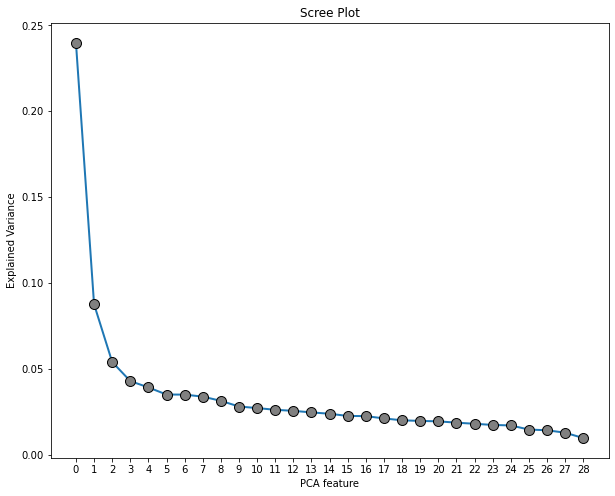

In [57]:
# INSTANTIATING a PCA model no limit to principal components
pca = PCA(n_components = None,   # number of principal components to develop
          random_state = 219)


# FITTING and TRANSFORMING the app scaled
app_pca = pca.fit_transform(app_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", app_scaled.shape)
print("PCA shape     :", app_pca.shape)



# calling the scree_plot function
scree_plot(pca_object = pca)

In [58]:
# explained variance ratio for the two PCs developed above
pca.explained_variance_ratio_

array([0.23989382, 0.08756156, 0.0539328 , 0.04281388, 0.03910665,
       0.03497076, 0.03492644, 0.0337456 , 0.0313004 , 0.02798763,
       0.02709631, 0.0260793 , 0.025467  , 0.02456763, 0.02377393,
       0.02250242, 0.02240612, 0.02105971, 0.01996393, 0.01960335,
       0.01935809, 0.0185899 , 0.01793688, 0.01726555, 0.01696739,
       0.01458187, 0.0141595 , 0.01274719, 0.00963437])

In [59]:
# reducing the PCA model
pca_0= PCA(n_components = 3,   # reduce number of principal components to develop
          random_state = 219)


# FITTING and TRANSFORMING the digits data
app_pca = pca_0.fit_transform(app_scaled)

In [60]:
# printing the sum of all explained variance ratios
print(pca_0.explained_variance_ratio_.sum().round(2))

0.38


In [61]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(app_consume.columns)


# ##################
# ### 3 PC Model ###
# ##################
# # transposing pca components (pc = 2)
factor_loadings_df1 = pd.DataFrame(np.transpose(pca_0.components_))


# naming rows as original features
factor_loadings_df1 = factor_loadings_df1.set_index(app_scaled.columns)


# checking the results
#print(f"""
#MAX Components Factor Loadings
#------------------------------
#{factor_loadings.round(2)}


#3 Components Factor Loadings
#------------------------------
#{factor_loadings_df1.round(2)}
#""")

In [62]:
# transposing pca components
factor_loadings_df1 = pd.DataFrame(np.transpose(pca_0.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df1 = factor_loadings_df1.set_index(app_scaled.columns)


# checking the result
print(factor_loadings_df1)


# saving to Excel
factor_loadings_df1.to_excel('consume_loadings_.xlsx')

           0     1     2
q4r1   -0.06 -0.33 -0.11
q4r2   -0.15 -0.21  0.31
q4r3   -0.14 -0.28  0.12
q4r4   -0.16 -0.21  0.29
q4r5   -0.09 -0.24 -0.23
q4r6   -0.05 -0.29 -0.38
q4r7   -0.09 -0.30  0.10
q4r8   -0.13 -0.29  0.08
q4r9   -0.08 -0.33  0.21
q4r10   0.03 -0.03  0.03
q4r11   0.06  0.24  0.26
q11    -0.05 -0.33 -0.10
q12     0.10  0.01 -0.38
q26r18  0.26 -0.12 -0.01
q26r3   0.13 -0.07  0.29
q26r4   0.26 -0.13  0.04
q26r5   0.23 -0.13  0.10
q26r6   0.23 -0.05 -0.06
q26r7   0.27 -0.12 -0.05
q26r8   0.26 -0.03  0.05
q26r9   0.20 -0.03  0.23
q26r10  0.27  0.02  0.12
q26r11  0.17 -0.10 -0.15
q26r12  0.25 -0.02 -0.18
q26r13  0.19 -0.14 -0.14
q26r14  0.27 -0.13  0.01
q26r15  0.23 -0.08  0.16
q26r16  0.23 -0.11 -0.01
q26r17  0.23 -0.01  0.20


*Trenster Profile:*
Borrowing from mobile market terminology this person would be considered a whale in terms of purchasing power. Most of these individuals are more willing to pay increased prices to follow the market. Primary seen through the number of purchases made through their phone. In this case specifically, the number of premium apps on their devices. Their awareness of the number of purchased apps implies an attachment to the social signals that trend following creates. This means that the social groups these individuals operate within are likely to have a heavy reliance on visibility and status as is commonly seen within TikTok and Instagram modernly. Terminally, this would imply that these users find the most value from social elements of media alongside the entertainment provided by this shift. 


Recommendation: Exclusivity and In-App Purchases
Direct monetization is appropriate for this behavior as they are likely to see the exclusivity of a paywall as a positive social signal. Considering the likelihood of passive consumption present here, ads and ads removal monetization strategies will likely result in the largest income stream. This group’s desire to use their phone as a new form of media to consume means that a modified version of the traditional television monetization system should capture much of the market. For the more aggressive users, additional in-app purchases are likely to capture them so long as it doesn’t alienate the free-to-play population. 

*Traditionalist Profile:*
This persona tends to prioritize the opposite systems of value than other users. They feel their phone is a source of utility over entertainment or simplicity. Most individuals in this group have a very low likelihood to install additional apps, let alone expend additional capital on what they have classified as a side function to their mobile phone. It will be exceptionally difficult to modernize this group as they’re less likely to believe there is additional value in new features or a new coat of paint. However, a demonstratable value of increased call quality or other easily isolated utility will likely be met with minimal pushback. 

Recommendation: 
This directly monetizing this population will be difficult, they are likely to provide exceptional utility via indirect income sources like game pausing ads or similar practices. As they are only using their phone for a minimal amount of time. As a group, they have the lowest likelihood to engage with direct ads, but that comes with a decreased likelihood to problematize low-impact ads e.g. background ads and seamless scroll. It is unlikely they will be a target market for anything outside of niche applications.

*Selective Utility Profile:*
While not exactly a middle ground, this persona is unique in that capital as opposed to utility seems to be their deciding factor. Absent the aggressive social patterns of the Trenster, they tend to prioritize specific things that are useful and may be willing to spend money on them. And, unlike the traditionalists, they also see additional value in exploring the utility of cell phones. They are primarily characterized by their desire to maximize the function of their device while minimizing cost. 

Recommendation: Freemium
In terms of monetizing this population, using freemium services is likely to draw in these users as they will convince themselves of the value being created. This means that non-invasive ads and other indirect strategies will likely achieve the most positive results. 


In [63]:
# naming each principal component
factor_loadings_df1.columns = ['Trenster',
                              'Traditionalist',      
                              'Selective utility'] 
                              

# checking the result
factor_loadings_df1

,Trenster,Traditionalist,Selective utility
q4r1,-0.06,-0.33,-0.11
q4r2,-0.15,-0.21,0.31
q4r3,-0.14,-0.28,0.12
q4r4,-0.16,-0.21,0.29
q4r5,-0.09,-0.24,-0.23
q4r6,-0.05,-0.29,-0.38
q4r7,-0.09,-0.30,0.10
q4r8,-0.13,-0.29,0.08
q4r9,-0.08,-0.33,0.21
q4r10,0.03,-0.03,0.03


In [64]:
# converting into a DataFrame 
app_pca = pd.DataFrame(app_pca)


# renaming columns
app_pca.columns = factor_loadings_df1.columns


# checking results
app_pca.round(decimals = 2)

,Trenster,Traditionalist,Selective utility
0,3.17,1.98,0.95
1,-3.37,1.68,3.37
2,4.40,1.23,-0.67
3,-1.75,2.09,0.79
4,-0.38,2.84,0.51
...,...,...,...
1547,-3.13,-0.56,-0.96
1548,-3.16,-0.37,-0.22
1549,-3.20,-1.84,1.78
1550,-2.46,-1.23,-0.93


# Psychometric

In [65]:
# summary of decriptive statistics
psychometric.describe(include = 'number').round(decimals = 2)

,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12
count,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00,1552.00
mean,3.16,1.70,2.22,3.24,2.87,1.81,2.07,1.99,3.81,2.05,2.44,1.98,2.37,2.46,2.24,2.27,2.38,4.29,2.12,2.66,2.16,2.18,2.44,2.75
std,1.54,0.96,1.40,1.57,1.45,1.05,1.10,1.04,1.61,1.09,1.28,1.03,1.12,1.22,1.08,1.10,1.17,1.55,1.05,1.24,1.12,1.14,1.17,1.33
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,2.00,1.00,1.00,2.00,2.00
50%,3.00,1.00,2.00,3.00,3.00,1.00,2.00,2.00,4.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,5.00,2.00,3.00,2.00,2.00,2.00,3.00
75%,4.00,2.00,3.00,4.00,4.00,2.00,3.00,3.00,5.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,6.00,3.00,3.00,3.00,3.00,3.00,4.00
max,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00,6.00


In [66]:
# applying the unsupervised_scaler function
psy_scaled = unsupervised_scaler(df = psychometric)


# checking pre- and post-scaling variance
print(np.var(psychometric), '\n\n')
print(np.var(psy_scaled))

q24r1     2.370016
q24r2     0.917307
q24r3     1.972626
q24r4     2.457613
q24r5     2.089064
q24r6     1.096755
q24r7     1.214049
q24r8     1.079791
q24r9     2.602488
q24r10    1.191352
q24r11    1.634449
q24r12    1.062101
q25r1     1.251600
q25r2     1.494538
q25r3     1.175736
q25r4     1.214625
q25r5     1.364530
q25r6     2.392788
q25r7     1.108724
q25r8     1.536148
q25r9     1.247248
q25r10    1.296109
q25r11    1.364405
q25r12    1.770293
dtype: float64 


q24r1     1.0
q24r2     1.0
q24r3     1.0
q24r4     1.0
q24r5     1.0
q24r6     1.0
q24r7     1.0
q24r8     1.0
q24r9     1.0
q24r10    1.0
q24r11    1.0
q24r12    1.0
q25r1     1.0
q25r2     1.0
q25r3     1.0
q25r4     1.0
q25r5     1.0
q25r6     1.0
q25r7     1.0
q25r8     1.0
q25r9     1.0
q25r10    1.0
q25r11    1.0
q25r12    1.0
dtype: float64


Original shape: (1552, 24)
PCA shape     : (1552, 24)


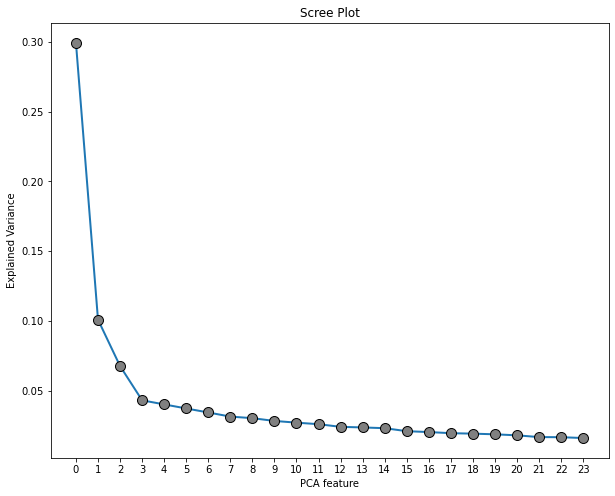

In [67]:
# INSTANTIATING a PCA model
pca = PCA(n_components = None,   # number of principal components to develop
          random_state = 219)


# FITTING and TRANSFORMING the digits data
psy_pca = pca.fit_transform(psy_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", psy_scaled.shape)
print("PCA shape     :", psy_pca.shape)



# calling the scree_plot function
scree_plot(pca_object = pca)

In [68]:
# explained variance ratio for the two PCs developed above
pca.explained_variance_ratio_

array([0.29952648, 0.10081784, 0.06755202, 0.04296243, 0.04003942,
       0.03712758, 0.03424359, 0.03129622, 0.03016217, 0.02817426,
       0.02694655, 0.02583674, 0.02394099, 0.02350873, 0.02297074,
       0.02082455, 0.0201958 , 0.01938711, 0.01905671, 0.01857427,
       0.01784694, 0.01659054, 0.01650859, 0.01590971])

In [69]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum().round(2))

1.0


In [70]:
# reducing the PCA model
pca_1= PCA(n_components = 3,   # number of principal components to develop
          random_state = 219)


# FITTING and TRANSFORMING the digits data
behavior_pca = pca_1.fit_transform(psy_scaled)

In [71]:
# printing the sum of all explained variance ratios
print(pca_1.explained_variance_ratio_.sum().round(2))

0.47


In [72]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(psychometric.columns)


# ##################
# ### 3 PC Model ###
# ##################
# # transposing pca components (pc = 2)
factor_loadings_1 = pd.DataFrame(np.transpose(pca_1.components_))


# naming rows as original features
factor_loadings_1 = factor_loadings_1.set_index(psy_scaled.columns)


# checking the results
#print(f"""
#MAX Components Factor Loadings
#------------------------------
#{factor_loadings.round(2)}


#3 Components Factor Loadings
#------------------------------
#{factor_loadings_1.round(2)}
#""")

In [73]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca_1.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(psy_scaled.columns)


# checking the result
print(factor_loadings_df)


# saving to Excel
factor_loadings_df.to_excel('psy_loadings_.xlsx')

           0     1     2
q24r1   0.09  0.31  0.29
q24r2   0.19 -0.18  0.28
q24r3   0.16 -0.07  0.32
q24r4   0.02  0.45  0.14
q24r5   0.16  0.11  0.31
q24r6   0.20 -0.10  0.14
q24r7   0.23 -0.11  0.23
q24r8   0.22 -0.19  0.24
q24r9   0.01  0.50  0.10
q24r10  0.24 -0.14  0.18
q24r11  0.25 -0.06  0.12
q24r12  0.25 -0.18  0.14
q25r1   0.26  0.08 -0.21
q25r2   0.25  0.11 -0.21
q25r3   0.25  0.05 -0.13
q25r4   0.25  0.03 -0.29
q25r5   0.26  0.03 -0.04
q25r6   0.02  0.42  0.21
q25r7   0.22  0.01 -0.21
q25r8   0.22  0.12 -0.21
q25r9   0.23  0.04 -0.15
q25r10  0.21 -0.03 -0.15
q25r11  0.22  0.10 -0.22
q25r12  0.12  0.26 -0.02


In [74]:
# naming each principal component
factor_loadings_df.columns = ['Visibility seekers', #self-identified leaders 
                              'Community seekers',  #feel at home     
                              'Tech Geeks'] #actively engages with technology
                              


# checking the result
factor_loadings_df

,Visibility seekers,Community seekers,Tech Geeks
q24r1,0.09,0.31,0.29
q24r2,0.19,-0.18,0.28
q24r3,0.16,-0.07,0.32
q24r4,0.02,0.45,0.14
q24r5,0.16,0.11,0.31
q24r6,0.20,-0.10,0.14
q24r7,0.23,-0.11,0.23
q24r8,0.22,-0.19,0.24
q24r9,0.01,0.50,0.10
q24r10,0.24,-0.14,0.18


*Visibility Seekers:*
This self-defined group indicates a very strong interest in being at the forefront of trends, but solely for their utility as opposed to any distinct value created from them. It’s safe to assume they would want the gratification that comes with popularity, but they also actively seek to capitalize on it as a subgoal as opposed to their main use case. Individuals in this classification are much less likely to doom scroll compared to the other groups. They find value in the reach and potential of apps as opposed to seeing them as a form of media to consume.

Recommendation: 
Attempts to capture this market will rely on making value direct and understandable. Relying on community creation paradigms will be less appealing as these users actively want to lead the crowd not find their crowd. This means that the opportunity to “go viral” is incredibly important to maximize their potential as it functions as a psychological hook.



*Community Seekers:* 
The signal feature of this population is the intentional engagement with social media sites like Facebook as it hints at the social appeal of mass media. Social ties are massively important for this population which means they likely fall into two primary demographics: Seniors and people below 30. This taps into the sense of community both populations desire while also utilizing the amount of time both have access to. Individuals in this category are those who are more likely to engage in specific subgroups as opposed to broader media spaces. This means that providing spaces for community building is critical as Facebook’s pages and Reddit’s subreddits demonstrate. 


Recommendation: 
While placing spaces behind paywalls may alienate most users, making them selective or private will provide a sense of exclusivity and strengthen community bonds as it becomes more and more self-selecting. Additional personalization options behind a paywall would also function to maximize the “human” elements of the platform while establishing an additional revenue stream. 


*Tech Geek:*
This motivation is a bit harder to pin down but primarily relies on the emotional utility provided by technology and mass media. While the other personas rely on specific things for gratification, community, and visibility specifically, this population relies on the very act of engaging as a means to an end. There is little strategic intention like those present in the visibility preference cluster or overt social bend like those seeking community. Self-expression and the perception of an audience tie this group together. 


Recommendation: 
To maximize this population, allowing them the perception of control would tap into their want to engage. This could take the form of a cycling button or personalization, but likely any of the more common addictive elements in social media will be what draws this population in so from there it’s only a question of how to monetize them once they’re on the platform.


In [75]:
# converting into a DataFrame 
behavior_pca = pd.DataFrame(behavior_pca)


# renaming columns
behavior_pca.columns = factor_loadings_df.columns


# checking results
behavior_pca.round(decimals = 2)

,Visibility seekers,Community seekers,Tech Geeks
0,6.68,1.42,-0.13
1,-2.96,-3.08,-1.61
2,4.93,0.07,-0.06
3,-1.92,-2.16,-1.26
4,0.85,-2.10,0.40
...,...,...,...
1547,-2.48,-0.34,0.62
1548,-1.05,2.39,-0.46
1549,-2.72,-2.01,-1.12
1550,-0.87,0.54,0.07


In [76]:
# exploring customers in the Healthfood Heroes persona
behavior_pca['Visibility seekers'][behavior_pca['Visibility seekers'] > 1.0]

0        6.684946
2        4.930827
8        2.155259
9        1.056993
12       2.925385
          ...    
1535     1.771874
1536     9.498090
1544     3.467331
1546    10.873893
1551     1.880911
Name: Visibility seekers, Length: 518, dtype: float64

# Clustering

In [77]:
seg_df = behavior_pca.join(app_pca)

seg_df

,Visibility seekers,Community seekers,Tech Geeks,Trenster,Traditionalist,Selective utility
0,6.684946,1.419349,-0.132509,3.172464,1.982865,0.945124
1,-2.957417,-3.075132,-1.607157,-3.371948,1.678426,3.374951
2,4.930827,0.065491,-0.056908,4.398989,1.232418,-0.668159
3,-1.923815,-2.161483,-1.264827,-1.745082,2.090700,0.787078
4,0.849281,-2.095118,0.404318,-0.375187,2.842451,0.506450
...,...,...,...,...,...,...
1547,-2.483148,-0.335904,0.622143,-3.127882,-0.555171,-0.959939
1548,-1.053768,2.385912,-0.464609,-3.163745,-0.367142,-0.218594
1549,-2.715041,-2.007644,-1.119021,-3.196557,-1.839286,1.775737
1550,-0.873361,0.536574,0.070713,-2.458937,-1.231990,-0.926024


In [78]:
# checking variance amongst clusters
np.var(seg_df)

Visibility seekers    7.188636
Community seekers     2.419588
Tech Geeks            1.620737
Trenster              6.956921
Traditionalist        2.539275
Selective utility     1.563540
dtype: float64

In [79]:
# applying the unsupervised_scaler function
seg_scaled = unsupervised_scaler(df = seg_df)


# checking pre- and post-scaling variance
print(np.var(seg_df), '\n\n')
print(np.var(seg_scaled))

Visibility seekers    7.188636
Community seekers     2.419588
Tech Geeks            1.620737
Trenster              6.956921
Traditionalist        2.539275
Selective utility     1.563540
dtype: float64 


Visibility seekers    1.0
Community seekers     1.0
Tech Geeks            1.0
Trenster              1.0
Traditionalist        1.0
Selective utility     1.0
dtype: float64


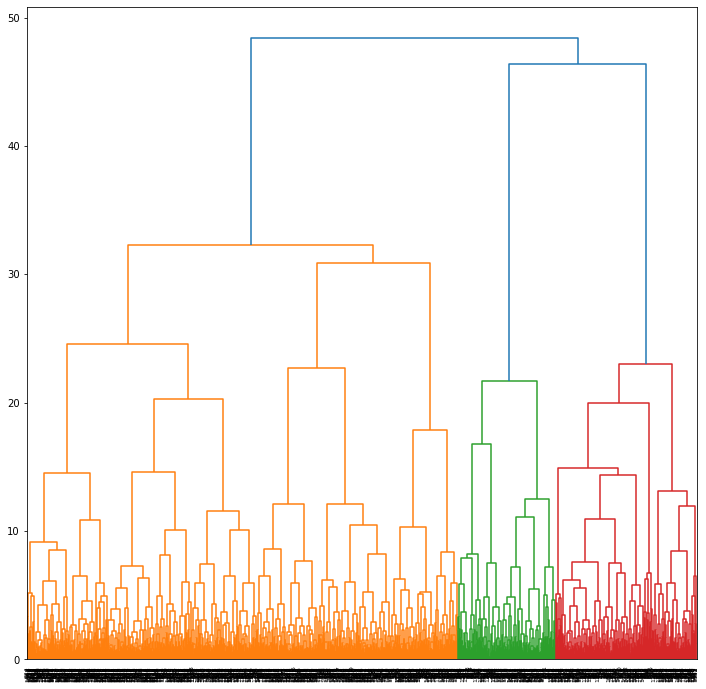

In [80]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = seg_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

K-Means Model

In [81]:
# INSTANTIATING a k-Means object with clusters
seg_k_pca = KMeans(n_clusters   = 3,
                         random_state = 219)


# fitting the object to the data
seg_k_pca.fit(seg_scaled)


# converting the clusters to a DataFrame
seg_kmeans_pca = pd.DataFrame({'Cluster': seg_k_pca.labels_})


# checking the results
print(seg_kmeans_pca.iloc[: , 0].value_counts())

0    740
2    480
1    332
Name: Cluster, dtype: int64


In [82]:
# storing cluster centers
centroids_pca = seg_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Visibility seekers',    
                            'Community seekers',
                            'Tech Geeks',                   
                            'Trenster',         
                            'Traditionalist',    
                            'Cost-conscious'] 


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Visibility seekers,Community seekers,Tech Geeks,Trenster,Traditionalist,Cost-conscious
0,-0.26,0.71,-0.08,0.04,-0.40,-0.41
1,-0.84,-1.07,-0.37,-1.17,0.31,0.29
2,0.98,-0.35,0.38,0.75,0.40,0.43


In [83]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([seg_kmeans_pca,
                         seg_df],
                         axis = 1)





# renaming columns
clst_pca_df.columns = ['Cluster',
                       'Visibility seekers',    
                        'Community seekers',
                        'Tech Geeks',                   
                        'Trenster',         
                        'Traditionalist',    
                        'Cost-conscious']    

# checking the results
print(clst_pca_df.head(n = 10))

   Cluster  Visibility seekers  Community seekers  Tech Geeks  Trenster  Traditionalist  Cost-conscious
0        2            6.684946           1.419349   -0.132509  3.172464        1.982865        0.945124
1        1           -2.957417          -3.075132   -1.607157 -3.371948        1.678426        3.374951
2        2            4.930827           0.065491   -0.056908  4.398989        1.232418       -0.668159
3        1           -1.923815          -2.161483   -1.264827 -1.745082        2.090700        0.787078
4        2            0.849281          -2.095118    0.404318 -0.375187        2.842451        0.506450
5        2            0.409039           0.074402    3.124319  4.094269        4.767057        3.181805
6        0           -1.655462           2.160725   -0.261260 -3.159578       -0.356202       -0.134997
7        0           -3.324033           2.034860    1.303397 -0.212178        1.012012       -1.053641
8        0            2.155259           2.509691   -0.313929 -0

# Demographics

In [84]:
#concatenating demographics into the clustered dataframe
final_clst_pca= pd.concat([clst_pca_df,
                         demographics],
                         axis = 1)
#checking for results
final_clst_pca

,Cluster,Visibility seekers,Community seekers,Tech Geeks,Trenster,Traditionalist,Cost-conscious,Age,Income,Gender
0,2,6.684946,1.419349,-0.132509,3.172464,1.982865,0.945124,10,5,1
1,1,-2.957417,-3.075132,-1.607157,-3.371948,1.678426,3.374951,5,10,2
2,2,4.930827,0.065491,-0.056908,4.398989,1.232418,-0.668159,7,6,1
3,1,-1.923815,-2.161483,-1.264827,-1.745082,2.090700,0.787078,7,5,1
4,2,0.849281,-2.095118,0.404318,-0.375187,2.842451,0.506450,2,4,2
...,...,...,...,...,...,...,...,...,...,...
1547,1,-2.483148,-0.335904,0.622143,-3.127882,-0.555171,-0.959939,2,1,1
1548,0,-1.053768,2.385912,-0.464609,-3.163745,-0.367142,-0.218594,4,9,2
1549,1,-2.715041,-2.007644,-1.119021,-3.196557,-1.839286,1.775737,3,12,2
1550,0,-0.873361,0.536574,0.070713,-2.458937,-1.231990,-0.926024,2,7,1


In [85]:
# renaming age according to the survey
Age = {1 : 'Under 18',
       2 : '18-24',
       3 : '25-29',
       4 : '30-34',
       5 : '35-39',
       6 : '40-44',
       7 : '45-49',
       8 : '50-54',
       9 : '55-59',
       10: '60-64',
       11: '65 or over'}


#replacing the each rows of the age column
final_clst_pca['Age'].replace(Age, inplace = True)

#Income divided into social income class according to PEW
Income = {1 : 'Low Income Class', #Under $10,000
       2 : 'Low Income Class', #$10,000 -$14,999
       3 : 'Low Income Class', #$15,000 - 19,999
       4 : 'Low Income Class',#$20,000 - 29,999
       5 : 'Low Income Class',#$30,000 - 39,999
       6 : 'Low Income Class', #$40,000 - 49,999
       7 : 'Middle Income Class', #$50,000 - 59,999
       8 : 'Middle Income Class', #$60,000 - 69,999
       9 : 'Middle Income Class', #$70,000 - 79,999
       10: 'Middle Income Class', #$80,000 - 89,999
       11: 'Middle Income Class',  #$90,000 - 99,999
          12: 'Middle Income Class', #$100,000 - 124,999
          13: 'Upper Income Class', #$125,000 - 149,999
          14: 'Upper Income Class'}  #$150,000 and over
#replacing the each rows of the income column
final_clst_pca['Income'].replace(Income, inplace = True)

#Gender divided into Male and Female
#If 1 is male, else female
Gender = {1 : 'Male',
       2 : 'Female'}

#replacing the each rows of the gender column

final_clst_pca['Gender'].replace(Gender, inplace = True)

# renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3'}
#replacing the each rows of the cluster column

final_clst_pca['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_clst_pca


# checking results
data_df

,Cluster,Visibility seekers,Community seekers,Tech Geeks,Trenster,Traditionalist,Cost-conscious,Age,Income,Gender
0,Cluster 3,6.684946,1.419349,-0.132509,3.172464,1.982865,0.945124,60-64,Low Income Class,Male
1,Cluster 2,-2.957417,-3.075132,-1.607157,-3.371948,1.678426,3.374951,35-39,Middle Income Class,Female
2,Cluster 3,4.930827,0.065491,-0.056908,4.398989,1.232418,-0.668159,45-49,Low Income Class,Male
3,Cluster 2,-1.923815,-2.161483,-1.264827,-1.745082,2.090700,0.787078,45-49,Low Income Class,Male
4,Cluster 3,0.849281,-2.095118,0.404318,-0.375187,2.842451,0.506450,18-24,Low Income Class,Female
...,...,...,...,...,...,...,...,...,...,...
1547,Cluster 2,-2.483148,-0.335904,0.622143,-3.127882,-0.555171,-0.959939,18-24,Low Income Class,Male
1548,Cluster 1,-1.053768,2.385912,-0.464609,-3.163745,-0.367142,-0.218594,30-34,Middle Income Class,Female
1549,Cluster 2,-2.715041,-2.007644,-1.119021,-3.196557,-1.839286,1.775737,25-29,Middle Income Class,Female
1550,Cluster 1,-0.873361,0.536574,0.070713,-2.458937,-1.231990,-0.926024,18-24,Middle Income Class,Male


In [86]:
#Hypothesis and assumptions
#cluster2= final_clst_pca[final_clst_pca['Cluster']==2]
#cluster2.head(n=100)

In [87]:
#cluster2['Age'].value_counts()

# Analyze with Demographics

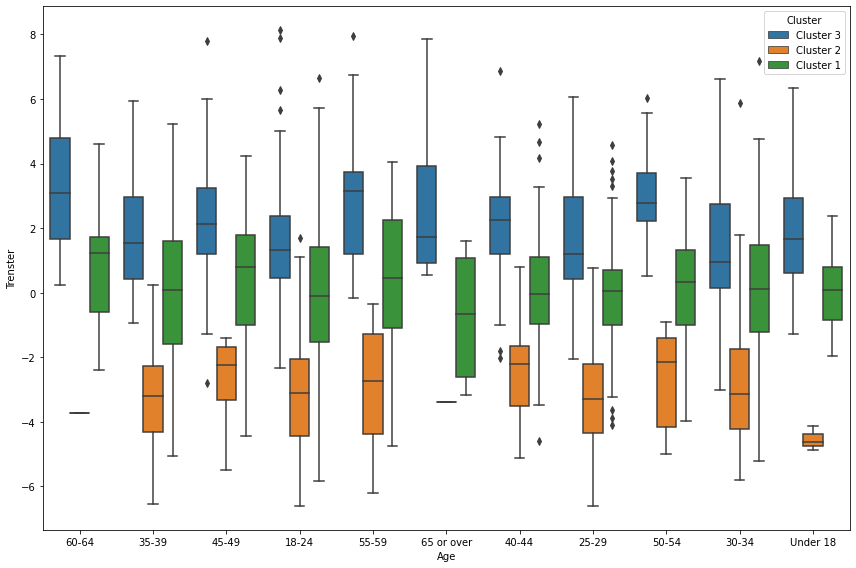

In [88]:
########################
# Age
########################

#Creating a boxplot
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age',
            y = 'Trenster',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

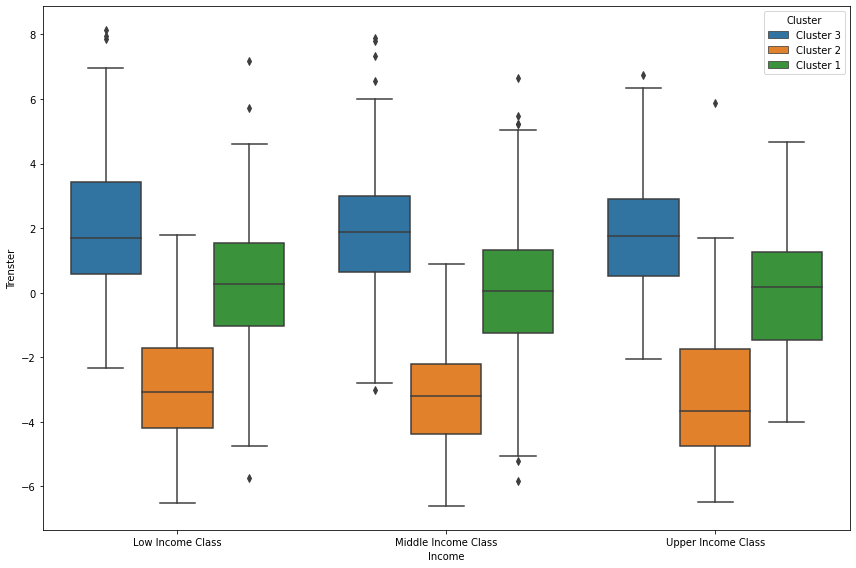

In [89]:
########################
# Income & Trenster
########################

#Creating a boxplot
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Income',
            y = 'Trenster',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

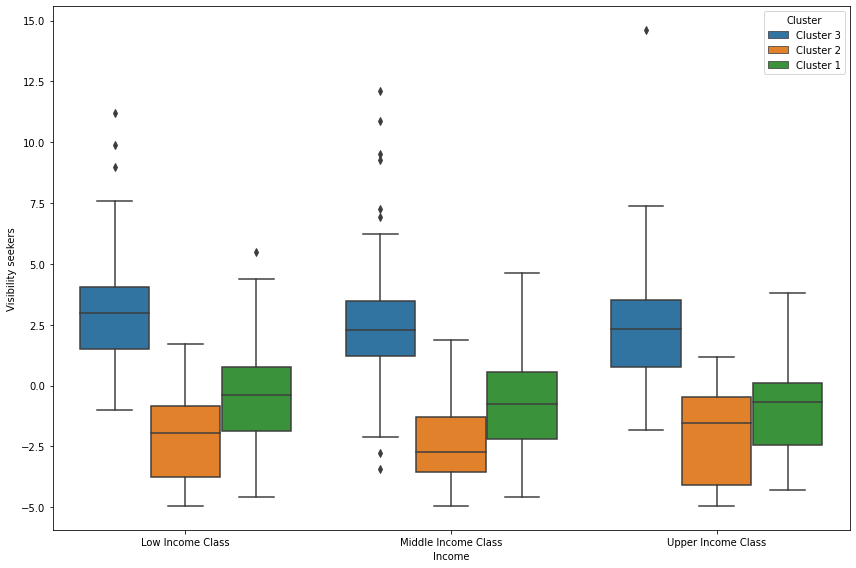

In [90]:
########################
# Gender & Trenster
########################

#Creating a boxplot
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Income',
            y = 'Visibility seekers',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

# Conclusion

Based on the analysis above, there is a potential market within the first cluster because they represent not only the largest cluster but the highest likelihood to engage with new products monetarily. This grouping largely consists of gratification-motivated Trensters who utilize technology as a method to signal their understanding of recent trends. While seeming paradoxical there are some obvious connecting factors between this pairing when demographics are thrown back in the mix. While millennials make up 23% of the total data set, they encompass a 48% majority of the cluster which confirms the assumption that generational difference impacts mobile usage, but also outlines the potentially contradicting mentality across the group. Despite the desire to follow trends, there is also the considerable pull for individualism that tends to define older generations across the U.S. An additional consideration is the income brackets these individuals fall into with more than 50% making below fifty thousand dollars a year. While this population is unlikely to have massive disposable income, there is an obvious desire to directly engage with apps, and based on the reported spending they clearly have no problem purchasing apps they feel are valuable.